In [3]:
import pandas as pd

import numpy as np

In [4]:
df=pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [6]:
df = df[df['Category'].isin(['ham', 'spam'])]


In [7]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [9]:
corpus=[]

for i in range(0,len(df)):

    review=re.sub('[^a-zA-Z]',' ',df['Message'][i].strip())

    review=review.lower()

    review=review.split()

    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    review=' '.join(review)

    corpus.append(review)

In [10]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=3000)
X=cv.fit_transform(corpus).toarray()
y=df['Category']

In [12]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
y_test.shape


(1115,)

In [15]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

In [16]:
models = {

    "Logistic Regression": LogisticRegression(max_iter=1000),

    "Ridge Classifier": RidgeClassifier(),

    "Decision Tree": DecisionTreeClassifier(),

    "AdaBoost": AdaBoostClassifier(),

    "Random Forest":RandomForestClassifier(),

    "Neighbor":KNeighborsClassifier()

}

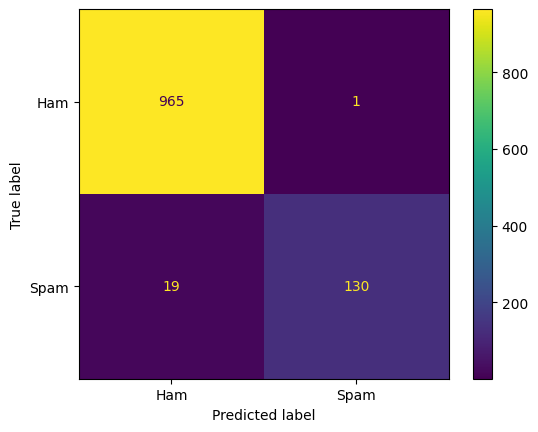

Logistic Regression 0.9820627802690582


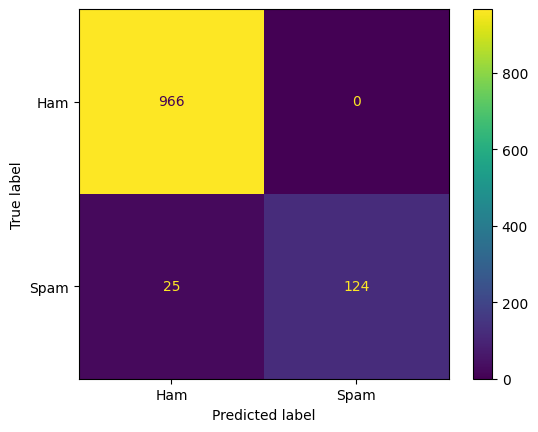

Ridge Classifier 0.9775784753363229


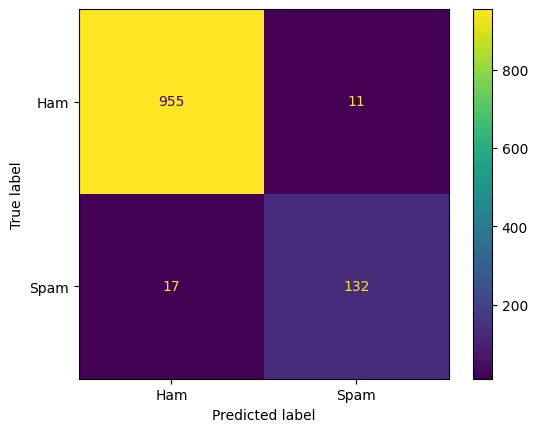

Decision Tree 0.9748878923766816


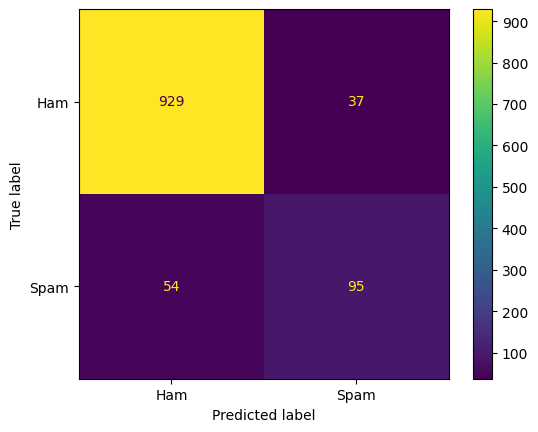

AdaBoost 0.9183856502242153


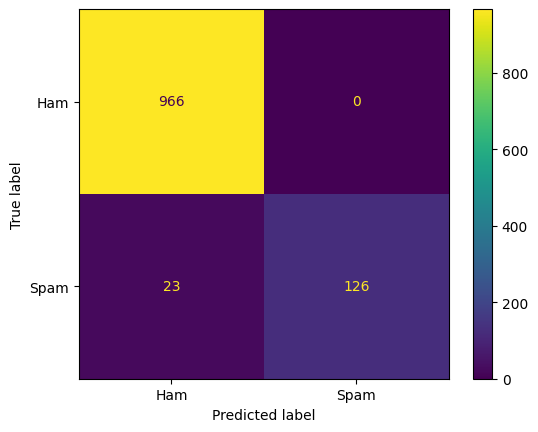

Random Forest 0.979372197309417


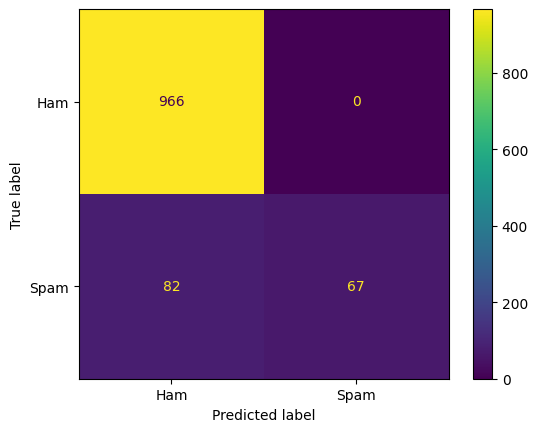

Neighbor 0.9264573991031391


In [17]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Ham", "Spam"])
    disp.plot()
    plt.show()
    print(name, accuracy_score(y_test, y_pred))

In [18]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC
nb = MultinomialNB()

nb.fit(X_train, y_train)



y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9820627802690582


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_nb = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_nb.fit(X_train, y_train)
print(grid_nb.best_params_)


{'alpha': 2.0}


In [20]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC
nb = MultinomialNB(alpha=2)

nb.fit(X_train, y_train)



y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9829596412556054


In [21]:
svm = LinearSVC()

svm.fit(X_train, y_train)



y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9856502242152466


In [22]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import LinearSVC



# param_grid = {

#     'C': [0.01, 0.1, 1,2,3,4,5, 10]

# }



# grid_svm = GridSearchCV(

#     LinearSVC(),

#     param_grid,

#     cv=5,

#     scoring='accuracy'

# )



# grid_svm.fit(X_train, y_train)

# print(grid_svm.best_params_)

# print("Best CV accuracy:", grid_svm.best_score_)

# grid_svm
# from sklearn.metrics import classification_report



# print(classification_report(y_test, y_pred_svm))
from sklearn.svm import LinearSVC


svc = LinearSVC(
    C=1,                 
    class_weight='balanced'
)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))


Accuracy: 0.9865470852017937
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[961   5]
 [ 10 139]]


In [24]:
scores = svc.decision_function(X_test)
y_pred = (scores > -0.9).astype(int)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[883  83]
 [  3 146]]


In [25]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_svc})

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV accuracy: 0.9813767973708183


In [27]:
best_lr = grid.best_estimator_
y_pred_best = best_lr.predict(X_test)
best_lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
print("Logistic Accuracy:", accuracy_score(y_test, y_pred_best))

Logistic Accuracy: 0.9847533632286996


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_rf = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42
)

random_rf.fit(X_train, y_train)

print("Best RF params:", random_rf.best_params_)


Best RF params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [30]:
model=RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=None
                                         )
model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [32]:
print(cm)
print(cr)

[[966   0]
 [ 20 129]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [33]:
print("Random Forest:", accuracy_score(y_test, y_pred))

Random Forest: 0.9820627802690582


### pickel file

In [34]:
import pickle



with open('best_model.pkl', 'wb') as f:

    pickle.dump(svc, f)


with open('vectorizer.pkl', 'wb') as f:

    pickle.dump(cv, f)


with open('label_encoder.pkl', 'wb') as f:

    pickle.dump(le, f)

print("Model, vectorizer, and label encoder have been pickled.")

Model, vectorizer, and label encoder have been pickled.


In [35]:
import pickle



with open('model_logistic.pkl', 'wb') as f:

    pickle.dump(grid, f)


with open('vectorizer_logistic.pkl', 'wb') as f:

    pickle.dump(cv, f)


with open('label_encoder_logistic.pkl', 'wb') as f:

    pickle.dump(le, f)

print("Model, vectorizer, and label encoder have been pickled.")

Model, vectorizer, and label encoder have been pickled.


In [36]:
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)


In [37]:
text = ["go jurong point crazi avail bugi n great world la e buffet cine got amor wat"]

X_new = vectorizer.transform(text)
pred = model.predict(X_new)

print("Prediction:", le.inverse_transform(pred))


Prediction: ['ham']


In [38]:
text = ["Win cash prize now!!! Click the link"]
X_new = vectorizer.transform(text)
pred = model.predict(X_new)
pred
print(le.inverse_transform(pred)[0])


ham


In [39]:
score = model.decision_function(X_new)
print(score)


[-0.13393263]


In [40]:
with open('model_logistic.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer_logistic.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('label_encoder_logistic.pkl', 'rb') as f:
    le = pickle.load(f)


In [41]:
text = ["Call this number immediately to avoid service disconnectionYour SIM will be blocked today. Call nowOTP required to complete transaction. Share immediatelyUrgent verification needed to keep your account active."]
X_new = vectorizer.transform(text)
pred = model.predict(X_new)
pred
print(le.inverse_transform(pred))

['ham']
